In [48]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn. linear_model import Lasso

from sklearn.metrics import mean_squared_error as MSE

In [49]:
sns.set_theme(style = 'darkgrid')

In [50]:
Dados = pd.read_csv('Dados\\Corpo.csv')

X = Dados.drop(['BodyFat', 'Density'], axis = 'columns')

Y = Dados[['BodyFat']]

In [51]:
X_Treino, X_Teste, Y_Treino , Y_Teste = train_test_split(
    
    X, Y,

    test_size = 0.2,

    random_state = 0

)

In [52]:
KF = KFold(n_splits = 5, shuffle = True , random_state = 0)

In [53]:
LASSO = Pipeline(

    [

        ('Escalonamento', StandardScaler(with_mean =  False)), 
        
        ('LASSO', Lasso())

    ]

)

Parametros = {'LASSO__alpha': 10**np. linspace(5, -2, 100)}

ALPHA = GridSearchCV(LASSO, Parametros, cv = KF, scoring = 'neg_mean_squared_error')

ALPHA.fit(X_Treino, Y_Treino)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=Pipeline(steps=[('Escalonamento',
                                        StandardScaler(with_mean=False)),
                                       ('LASSO', Lasso())]),
             param_grid={'LASSO__alpha': array([1.00000000e+05, 8.49753436e+04, 7.22080902e+04, 6.13590727e+04,
       5.21400829e+04, 4.43062146e+04, 3.76493581e+04, 3.19926714e+04,
       2.71858824e+04, 2.31012970e+04, 1.963040...
       4.22924287e-01, 3.59381366e-01, 3.05385551e-01, 2.59502421e-01,
       2.20513074e-01, 1.87381742e-01, 1.59228279e-01, 1.35304777e-01,
       1.14975700e-01, 9.77009957e-02, 8.30217568e-02, 7.05480231e-02,
       5.99484250e-02, 5.09413801e-02, 4.32876128e-02, 3.67837977e-02,
       3.12571585e-02, 2.65608778e-02, 2.25701972e-02, 1.91791026e-02,
       1.62975083e-02, 1.38488637e-02, 1.17681195e-02, 1.00000000e-02])},
             scoring='neg_mean_squared_error')

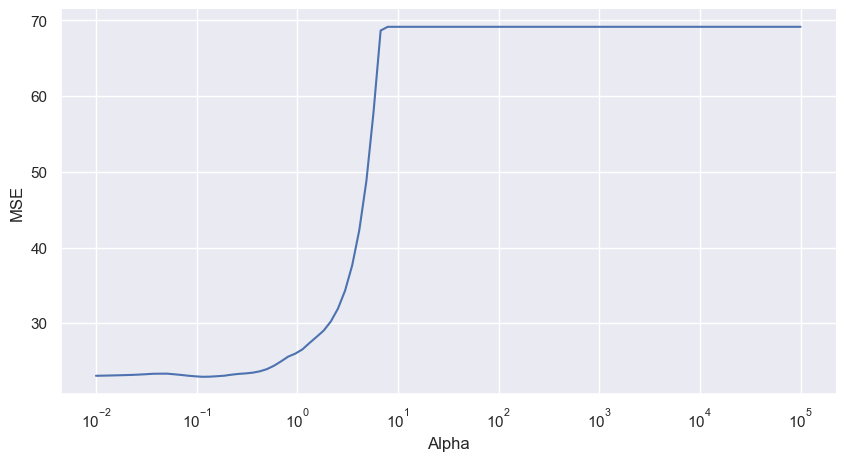

In [54]:
Grade = pd.DataFrame(ALPHA.cv_results_)

Grade = Grade[['param_LASSO__alpha', 'mean_test_score']]

Grade = Grade.rename(

    columns = {

        'param_LASSO__alpha': 'Alpha', 
        
        'mean_test_score': 'MSE'

    }

)

Grade['MSE'] = -Grade['MSE']

plt.figure(figsize = (10, 5))

Grafico = sns.lineplot(

    data = Grade, 
    
    x = 'Alpha', y = 'MSE'
    
)

Grafico.spines['right'].set_visible(False)

Grafico.spines['top'].set_visible(False)

plt.xscale('log')

plt.show()

In [55]:
ALPHA_ast = ALPHA.best_params_['LASSO__alpha']

print(f'Melhor alpha: {np.round(ALPHA_ast, 4)}')

Melhor alpha: 0.115


In [56]:
LASSO_ast = Lasso(alpha = ALPHA_ast)

LASSO_ast.fit(X_Treino, Y_Treino)

Lasso(alpha=0.11497569953977356)

In [57]:
Teste = [MSE(Y_Teste, LASSO_ast.predict(X_Teste))]

Estimador = ['Lasso']